#                         Week 10 Exercise Solution

## Exercise 10.2.3 (Solving ODE by Julia)

In [1]:
using Plots 
using DifferentialEquations

In [2]:
inflow=3.0;               # parameter used in the model
outflow=1.0;              # parameter used in the model
f(u,p,t)=inflow-outflow;  # the differential equation function
tspan=(0.0,5.0)           # the timespan on which the solution is required
u0=0.0                    # initial value of v (ie empty bathtub)
watertub=ODEProblem(f,u0,tspan);

In [3]:
sol=solve(watertub,reltol=1.0e-8);

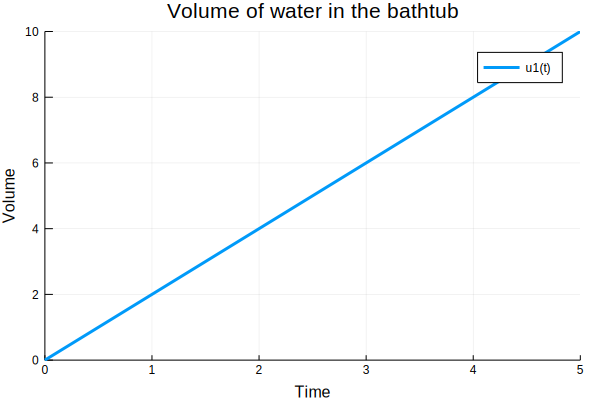

In [4]:
plot(sol,xlabel="Time",ylabel="Volume",title="Volume of water in the bathtub")

In [5]:
# The volume u(t) at t=5:
sol.u[end]

10.0

The computed result shown above makes sense. The inflow rate 3 and outflow rate 1 produces a net gain of 2 litres per minute. After 5 minutes we expect $5\times2=10$ litres to be in the tub, which agrees with the computational result shown in the graph.

## (*Optional) Exercise 10.2.5 

In [6]:
r=0.00153;              #Growth rate in 1800 (from Table on page 8 in the notes)
#dudt=f, f=r*u
f(pop,p,t)=r*pop        # p is a parameter name needed in the code 
tspan=(1800.0,2011.0)   # New solution interval
u0 =1.0                 # Population in 1800 (in billions)
popprob=ODEProblem(f,u0,tspan)
Res = solve(popprob);

The last quantity of res is 1.38103 is the final(2011) population value (in billions). This value is Res.u[end]:

In [7]:
Res.u[end]

1.381030555865513

This 2011 population value 1.3810305586118325 is much less than the given 2011 population of 7 billion. Hence the growth has been much greater than exponential. The second part of the exercise simply involves changing the value of the growth rate, r, and solving again.

## (*Optional) Exercise 10.2.7 

### *Q1. (Toilet cistern)

In [8]:
function f(u,p,t)
r=10.0;                          # litres per minute
k=20.0                           # Volume of cistern
dudt=r*(1-u/k)                   # the last expression in a function def 
                                 # returns the function value
end

tspan=(0.0,5.0)                  # Solve for 5 minutes
u0 =0.0                          # Empty cistern initially
ODEp=ODEProblem(f,u0,tspan)
Res = solve(ODEp); 

The above is not a true logistic equation but more representative of cistern dynamics. If you use the logistic equation you need an initial value greater than 0.0 otherwise the cistern never fills.

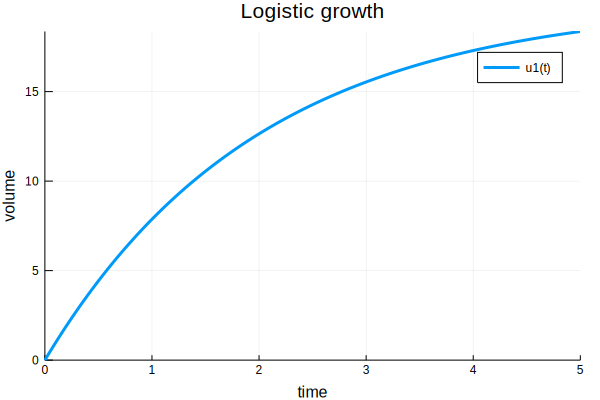

In [9]:
plot(Res,xlabel="time",ylabel="volume",title="Logistic growth")

In [10]:
Res.u[end]

18.3582743567441

The above result shows the inlfow rate is not fast enough. In fact it takes infinitely long to fill completely.

### *Q2. (Tablet computers)

Try different values of r and k to obtain data similar to:

May 2010, 3% owned tablets. About May 2015, 45% owned tablets.

In [11]:
function f(u,p,t)
r=0.7;           #Rate of growth of tablet owners (fraction % per year)
k=80.0           #Potential percentage of population that will own tablets
pdot=r*u*(1-u/k) #Logistic equation
pdot
end
horizon=(0.0,5.0)# Solve for 5 years
u0 = 3.0         # Ownership initially
de=ODEProblem(f,u0,horizon)
Soln = solve(de,Tsit5(),reltol=1e-8)
Soln.u[end]      # Show the final value ie ownership after 5 years

45.06874239042224

The final value above is close enough to the specified 45%. Now let us plot the result and compare with the data:

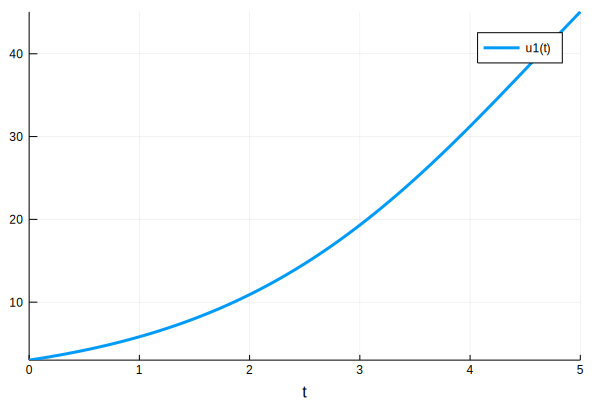

In [12]:
plot(Soln)

This does not show the curve starting to atten as seen in the date. Try again with r=0.94 and k=51.635. How does it look to you?

## Exetrcise 10.3.5 (Predador-Prey model)

### Q1(a). 
#### This is simply changing initial values. Size of the phase plane changes in response.

### Q1(b).
#### Change the equations as given in the code below

In [13]:
function f(y,p,t)
r=0.1; b=0.01; c=0.001; d=0.1;k=300.00; #The parameter k=100 has been added
ydot=similar(y)
ydot[1]=r*y[1]*(1-y[1]/k) - b*y[1]*y[2] # The first term in this equation has been changed
ydot[2]=c*y[1]*y[2] - d*y[2]
ydot
end 

interval=(0.0,300.0)     #timespan of the solution
yinit=[50.0;20.0] #Initial values of the state variables
DifEqn=ODEProblem(f,yinit,interval);

In [14]:
SolRes = solve(DifEqn,reltol=1e-8); # Solves the problem

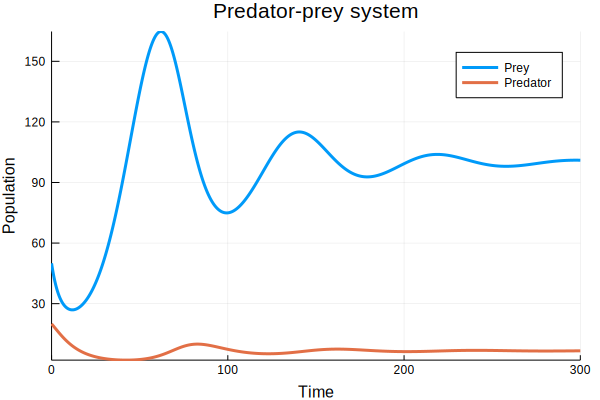

In [15]:
plot(SolRes,title="Predator-prey system",xlabel="Time",ylabel="Population",label=["Prey","Predator"]) 

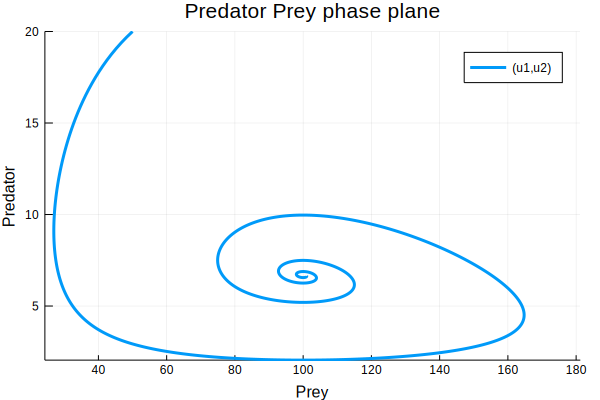

In [47]:
plot(SolRes,vars=(1,2),xlabel="Prey",ylabel="Predator",title="Predator Prey phase plane")

Note that the system now spirals in to a steady state between predator and prey.

### Q2 (Two species in competition)

In [16]:
function f(x,p,t)
r=[0.9;1.1];k=100; #The parameter k=100 has been added
xdot=similar(x)
xdot[1]=r[1]*x[1]*(1-(x[1]+x[2])/k) # The 1st term in the eqn has been changed
xdot[2]=r[2]*x[2]*(1-(x[1]+x[2])/k)
xdot
end
tlength=100.0                        #Specify the final time
tspan=(0.0,tlength)                  #timespan of the solution
xinit=[40.0;80.0]                    #Initial values of the state variables
odesys = ODEProblem(f,xinit,tspan); 

In [17]:
Solns=solve(odesys,Tsit5(),reltol=1.0e-8); # Solves the problem

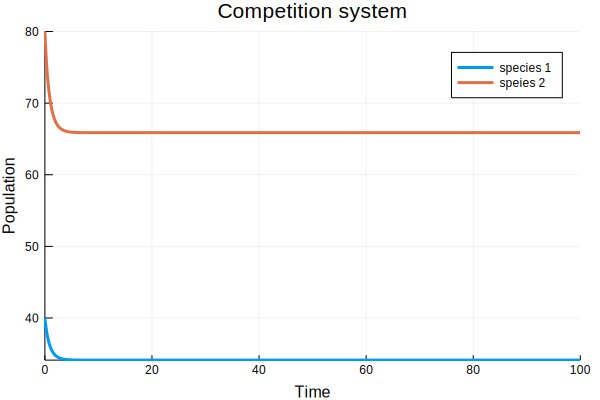

In [18]:
plot(Solns,title="Competition system",xlabel="Time",ylabel="Population",label=["species 1","speies 2"])

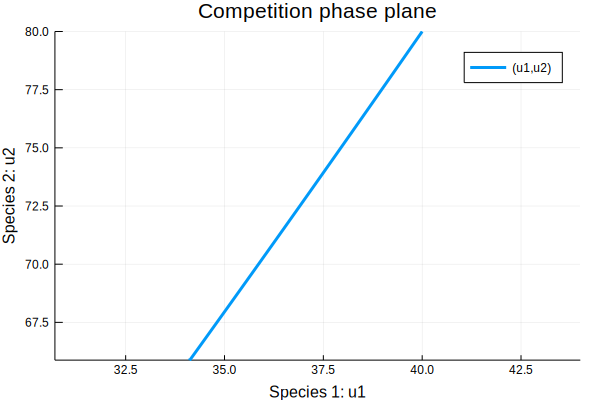

In [19]:
plot(Solns,vars=(1,2),title="Competition phase plane",xlabel="Species 1: u1",ylabel="Species 2: u2") 

## (*Optional) Exercise 10.3.7

### *Q1
#### Q1(a) and (b): Plotting phase planes - use the same procedure as in earlier exercises.

### *Q2. 

By calculation,
final cane biomass value without parasitoids: $x[end,1]=27$. 

final cane biomass with 6 parasitoids: $x[end,1]=67$.

                  biomass gain = 67-27 = 40

The profit using 6 parasitoidsunits (initial value 6) :

           10 x biomass gain-30 x 6.0=10x40-6x30=220>0.

Yes, it is worth using parasitoids.

### *Q3

Increase the number of parasitoids and repeat the procedure each time checking the profit.

Increase the parasitoid units to 7, 8, 9, 10, 11, 12, 13, 14 you may find the profit becomes 240, 264, 279, 291, 297, 298, 293, 282, respectively.

Thus, a good choice is to release 12 parasitoid units.